In [29]:
import pickle
import numpy as np
from numpy import dot
from numpy.linalg import norm
from matplotlib import pyplot as plt
from whatlies import Embedding
from whatlies.embeddingset import EmbeddingSet
import pandas as pd

In [2]:
year_list = [
    '1900_1909',
    '1910_1919',
    '1920_1929',
    '1930_1939',
    '1940_1949',
    '1950_1959',
    '1960_1969',
    '1970_1979',
    '1980_1989',
    '1990_1999',
    '2000_2009',
    '2010_2020'
]

NOTE: if adapting the pipeline, replace 'crs_full_results_for_figures_tables' with 'crs_agg_vectors'

In [5]:
# LOAD COUNTRY YEAR VECS

with open('./crs_full_results_for_figures_tables/country_year_agg.pkl', 'rb') as handle:
    country_year_agg = pickle.load(handle)

In [6]:
# LOAD CONCEPT YEAR VECS

with open('./crs_full_results_for_figures_tables/concept_year_agg.pkl', 'rb') as handle:
    concept_year_agg = pickle.load(handle)

In [7]:
# LOAD COUNTRY AGGREGATE CLUSTER VECS

with open('./crs_full_results_for_figures_tables/country_clust_agg.pkl', 'rb') as handle:
    country_clust_agg = pickle.load(handle)

In [8]:
# LOAD CONCEPT AGGREGATE CLUSTER VECS

with open('./crs_full_results_for_figures_tables/concept_clust_agg.pkl', 'rb') as handle:
    concept_clust_agg = pickle.load(handle)

In [9]:
# SELF-TO-SELF COSINE SIMILARITY FOR A MATRIX OF VECTORS. VECTORS WILL BE L2 NORMALIZED

def pairwise_cosine_sim(m):
    m = m.T
    d = m.T @ m
    norm = ( m * m).sum(0, keepdims=True) ** .5
    sim_m = d / norm / norm.T
    return sim_m

In [10]:
def target_cosine_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [11]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['dictator'][year])

decade_vecs = np.vstack(decade_vecs)
dictator = pairwise_cosine_sim(decade_vecs)

In [12]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['autocracy'][year])

decade_vecs = np.vstack(decade_vecs)
autocracy = pairwise_cosine_sim(decade_vecs)

In [13]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['autocratic'][year])

decade_vecs = np.vstack(decade_vecs)
autocratic = pairwise_cosine_sim(decade_vecs)

In [14]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['dictatorship'][year])

decade_vecs = np.vstack(decade_vecs)
dictatorship = pairwise_cosine_sim(decade_vecs)

In [15]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['authoritarianism'][year])

decade_vecs = np.vstack(decade_vecs)
authoritarianism = pairwise_cosine_sim(decade_vecs)

In [16]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(concept_year_agg['democracy'][year])

decade_vecs = np.vstack(decade_vecs)
democracy = pairwise_cosine_sim(decade_vecs)

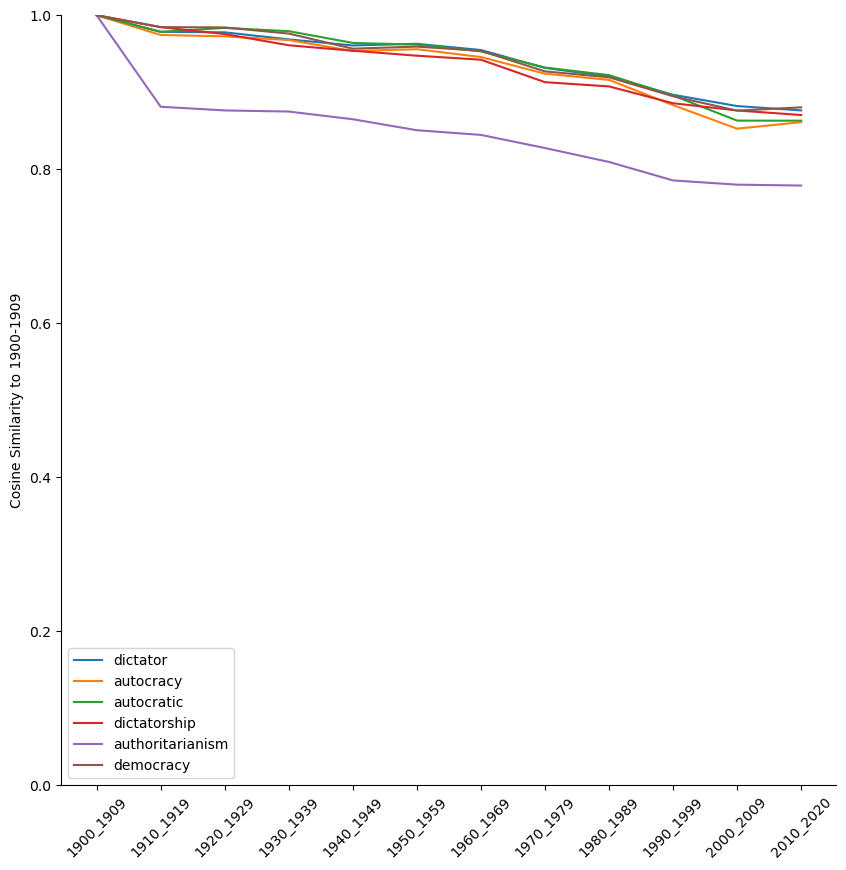

In [17]:
#FIGURE 1

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(year_list, dictator[0], label='dictator')
plt.plot(year_list, autocracy[0], label='autocracy')
plt.plot(year_list, autocratic[0], label='autocratic')
plt.plot(year_list, dictatorship[0], label='dictatorship')
plt.plot(year_list, authoritarianism[0], label='authoritarianism')
plt.plot(year_list, democracy[0], label='democracy')

plt.xticks(rotation=45)

plt.ylabel("Cosine Similarity to 1900-1909")
plt.ylim((0.0, 1.0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.legend()

plt.savefig("./crs_full_results_for_figures_tables/lineplot_term.svg")

In [18]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(country_year_agg['china'][year])

decade_vecs = np.vstack(decade_vecs)
china = pairwise_cosine_sim(decade_vecs)

In [19]:
decade_vecs = []
for year in year_list[5:]:
    decade_vecs.append(country_year_agg['north korea'][year])

decade_vecs = np.vstack(decade_vecs)
north_korea = pairwise_cosine_sim(decade_vecs)

In [20]:
decade_vecs = []
for year in year_list[5:]:
    decade_vecs.append(country_year_agg['south korea'][year])

decade_vecs = np.vstack(decade_vecs)
south_korea = pairwise_cosine_sim(decade_vecs)

In [21]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(country_year_agg['canada'][year])

decade_vecs = np.vstack(decade_vecs)
canada = pairwise_cosine_sim(decade_vecs)

In [22]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(country_year_agg['united kingdom'][year])

decade_vecs = np.vstack(decade_vecs)
united_kingdom = pairwise_cosine_sim(decade_vecs)

In [23]:
decade_vecs = []
for year in year_list:
    decade_vecs.append(country_year_agg['germany'][year])

decade_vecs = np.vstack(decade_vecs)
germany = pairwise_cosine_sim(decade_vecs)

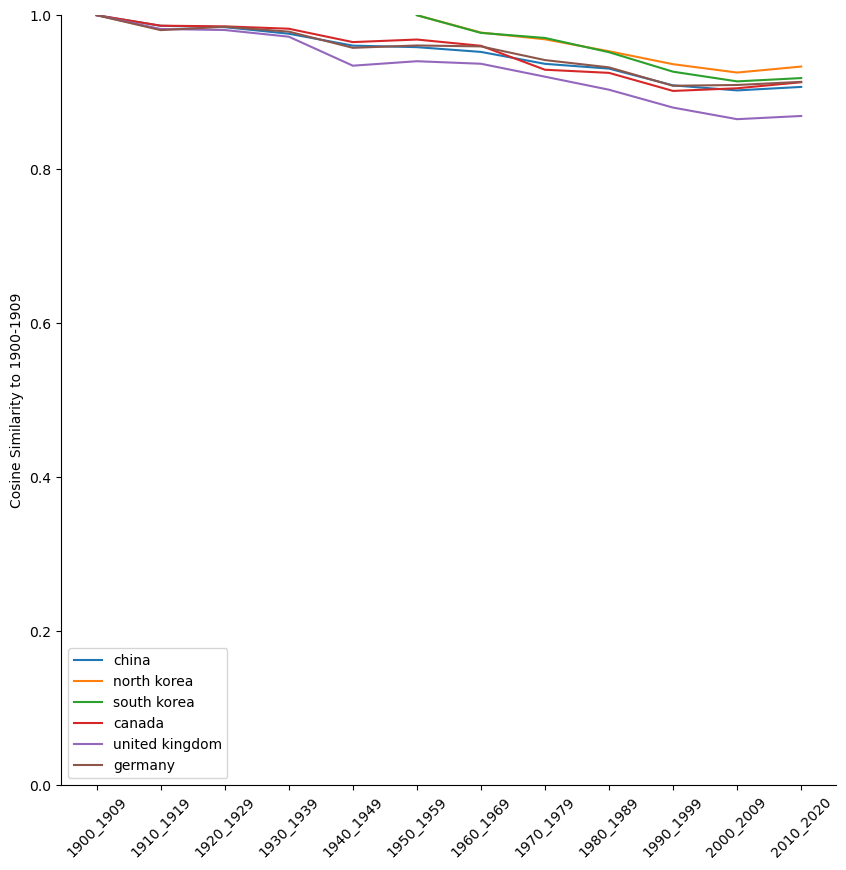

In [24]:
#FIGURE 2

fig, ax = plt.subplots(figsize=(10, 10))


plt.plot(year_list, china[0], label='china')
plt.plot(year_list[5:], north_korea[0], label='north korea')
plt.plot(year_list[5:], south_korea[0], label='south korea')
plt.plot(year_list, canada[0], label='canada')
plt.plot(year_list, united_kingdom[0], label='united kingdom')
plt.plot(year_list, germany[0], label='germany')
plt.legend()


plt.xticks(rotation=45)

plt.ylabel("Cosine Similarity to 1900-1909")
plt.ylim((0.0, 1.0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.legend()

plt.savefig("./crs_full_results_for_figures_tables/lineplot_country.svg")

In [25]:
#FIGURE 3

axis_terms = ['autocracy', 'autocracy']
axis_years = ['1950_1959', '2010_2020']
plot_terms = ['dictator', 'autocratic']

emb1 = Embedding(axis_terms[0] + '_' + axis_years[0].split('_')[0], concept_year_agg[axis_terms[0]][axis_years[0]])
emb2 = Embedding(axis_terms[1] + '_' + axis_years[1].split('_')[0], concept_year_agg[axis_terms[1]][axis_years[1]])
color_list = ['anchor','anchor']
full_list = [Embedding('dictator', concept_year_agg['dictator']['1950_1959']), Embedding('autocratic', concept_year_agg['autocratic']['1950_1959'])]


for term in plot_terms:

    for year, clusters in concept_clust_agg[term].items():
        for cluster, content in clusters.items():
            temp_embed =  Embedding(f"{term}_{year}_{cluster}", content['cluster_mean'])
            full_list.append(temp_embed)
            color_list.append(term)

autocratic_dictator = EmbeddingSet(*full_list)
autocratic_dictator = autocratic_dictator.assign(term=color_list)

autocratic_dictator.plot_interactive(x_axis=emb1, annot=False,
                                           y_axis=emb2, color = 'term',
                                           axis_metric = 'cosine_similarity')

alt.Chart(...)

In [26]:
#FIGURE 4

axis_terms = ['democracy', 'autocracy']
axis_years = ['2010_2020', '2010_2020']
plot_terms = ['china', 'germany']

emb1 = Embedding(axis_terms[0] + '_' + axis_years[0].split('_')[0], concept_year_agg[axis_terms[0]][axis_years[0]])
emb2 = Embedding(axis_terms[1] + '_' + axis_years[1].split('_')[0], concept_year_agg[axis_terms[1]][axis_years[1]])
color_list = ['anchor','anchor']
full_list = [Embedding('china', country_year_agg['china']['2010_2020']), Embedding('germany', country_year_agg['germany']['2010_2020'])]


for term in plot_terms:

    for year, clusters in country_clust_agg[term].items():
        for cluster, content in clusters.items():
            temp_embed =  Embedding(f"{term}_{year}_{cluster}", content['cluster_mean'])
            full_list.append(temp_embed)
            color_list.append(term)

china_germany = EmbeddingSet(*full_list)
china_germany = china_germany.assign(term=color_list)

china_germany.plot_interactive(x_axis=emb1, annot=False,
                                           y_axis=emb2, color = 'term',
                                           axis_metric = 'cosine_similarity')

alt.Chart(...)

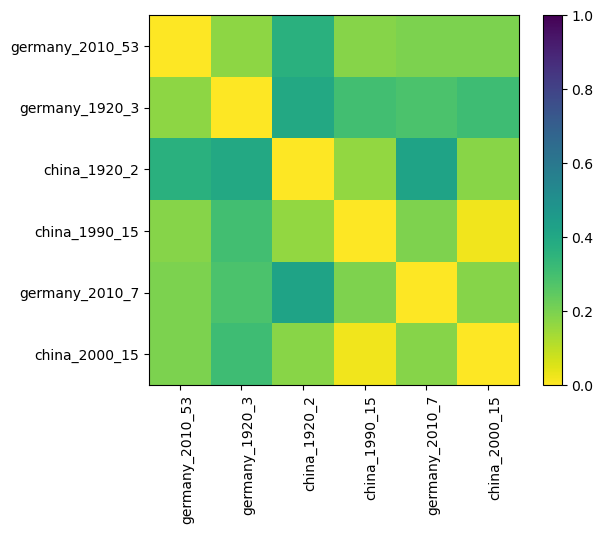

In [27]:
#FIGURE 5

germany_2010_2020_53 = Embedding('germany_2010_53', country_clust_agg['germany']['2010_2020']['53']['cluster_mean'])
germany_1920_1929_3 = Embedding('germany_1920_3', country_clust_agg['germany']['1920_1929']['3']['cluster_mean'])
china_1920_1929_2 = Embedding('china_1920_2', country_clust_agg['china']['1920_1929']['2']['cluster_mean'])
china_1990_1999_15 = Embedding('china_1990_15', country_clust_agg['china']['1990_1999']['15']['cluster_mean'])
germany_2010_2020_7 = Embedding('germany_2010_7', country_clust_agg['germany']['2010_2020']['7']['cluster_mean'])
china_2000_2009_15 = Embedding('china_2000_15', country_clust_agg['china']['2000_2009']['15']['cluster_mean'])

cos_emb = EmbeddingSet(germany_2010_2020_53, germany_1920_1929_3, china_1920_1929_2, china_1990_1999_15, germany_2010_2020_7, china_2000_2009_15)

cos_emb.plot_distance(norm=True)

In [30]:
#TABLE 2

df = pd.DataFrame({'germany_2010_2020_53': pd.Series(list(country_clust_agg['germany']['2010_2020']['53']['term_ranks'].keys())),
                   'germany_1920_1929_3': pd.Series(list(country_clust_agg['germany']['1920_1929']['3']['term_ranks'].keys())),
                  'germany_2010_2020_7': pd.Series(list(country_clust_agg['germany']['2010_2020']['7']['term_ranks'].keys())),
                    'china_1920_1929_2': pd.Series(list(country_clust_agg['china']['1920_1929']['2']['term_ranks'].keys())),               
                   'china_1990_1999_15': pd.Series(list(country_clust_agg['china']['1990_1999']['15']['term_ranks'].keys())),
                   'china_2000_2009_15':pd.Series(list(country_clust_agg['china']['2000_2009']['15']['term_ranks'].keys()))})

df.head(25)

,germany_2010_2020_53,germany_1920_1929_3,germany_2010_2020_7,china_1920_1929_2,china_1990_1999_15,china_2000_2009_15
0,nazi,france,france,ancient,great,rise
1,west,russia,poland,modern,modern,communist
2,east,england,italy,republic,communist,modern
3,berlin,italy,japan,history,contemporary,india
4,weimar,austria,turkey,today,new,mainland
5,imperial,switzerland,russia,contemporary,mainland,taiwan
6,bonn,czechoslovakia,germany,government,south,like
7,hamburg,ana,greece,childhood,indo,new
8,hardin,spain,homer,modernization,blink,rural
9,trumpeter,czecho,send,credit,multilateral,federalist


In [31]:
df.to_csv("./crs_full_results_for_figures_tables/germany_china.csv")